# **Performance Analysis of the Parallel Sudoku Solver Algorithm**

### **Group Members**
- **Camilo José Sinning López**
- **Oliver Mosgaard Stege**
- **Raul Eduardo Vergara Lacouture**

---

### **System Specifications**
All experiments were conducted on a laptop with the following processor details:
- **Processor:** AMD Ryzen 5 7520U with Radeon Graphics  
  - 4 CPU cores with simultaneous multithreading (SMT)  
  - 8 threads  
  - **Base Clock:** 2.8 GHz  
  - **Max Boost Clock:** Up to 4.3 GHz  

---

### **Problem Types**
The analysis focused on solving the following Sudoku puzzles:  
1. **9x9 Sudoku** – Single solution  
2. **16x16 Sudoku** – 80 solutions  
3. **25x25 Sudoku** – Single solution  

The **parallel algorithm** used is a modification of the **Backtracking algorithm** to leverage parallel computing.  

---

### **Dataset Description**
The dataset contains the following attributes:
- **time**: Execution time  
- **grid_size**: Size of the Sudoku grid  
- **block_size**: Sub-grid size  
- **threads_used**: Number of threads utilized  
- **solutions**: Number of solutions found  
- **max_depth**: Maximum depth for backtracking  

---

### **Experiments Conducted**
1. **Fixed `max_depth` (3):** 42 samples  
   - For each thread count (1 to 12), 3 samples were collected for **9x9 Sudoku** and **25x25 Sudoku**.  

2. **Variable `max_depth`:** x samples
   - For thread counts ranging from 1 to 8, experiments were conducted for each `max_depth` value in {3, 5, 7, 9}.  
   - Three samples were collected for each configuration.  

---

> **Note:**  
> The **25x25 Sudoku** was excluded from some experiments due to the excessive computational time required. Obtaining a statistically significant number of samples was deemed infeasible.  


In [1]:
import pandas as pd

# Read the CSV file
times_df = pd.read_csv('../output/times.csv')
times_df.head()

,time,grid_size,block_size,threads_used,solutions,max_depth
0,0.021,9,3,1,1,3
1,87.483,16,4,1,80,3
2,0.019,9,3,2,1,3
3,131.530,16,4,2,80,3
4,0.018,9,3,4,1,3


## **Fixed `max_depth` (3)**

In [3]:
# First 500 values of threads_used with values <= 8
filtered_df_1 = times_df.head(42)
filtered_df_1 = filtered_df_1[filtered_df_1['threads_used'] <= 8]

### 9x9 sudoku

In [4]:
grid_size_9 = filtered_df_1[filtered_df_1['grid_size'] == 9]
grid_size_9.head()

,time,grid_size,block_size,threads_used,solutions,max_depth
0,0.021,9,3,1,1,3
2,0.019,9,3,2,1,3
4,0.018,9,3,4,1,3
6,0.015,9,3,6,1,3
8,0.020,9,3,8,1,3


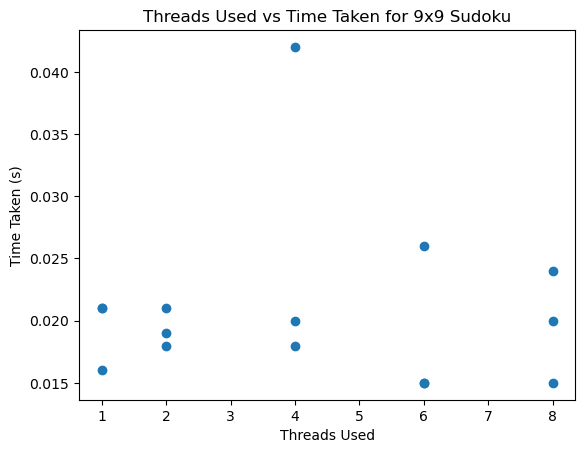

In [6]:
import matplotlib.pyplot as plt

threads_used = grid_size_9['threads_used'].values
time_taken = grid_size_9['time'].values

plt.scatter(threads_used, time_taken)
plt.xlabel('Threads Used')
plt.ylabel('Time Taken (s)')
plt.title('Threads Used vs Time Taken for 9x9 Sudoku')
plt.show()

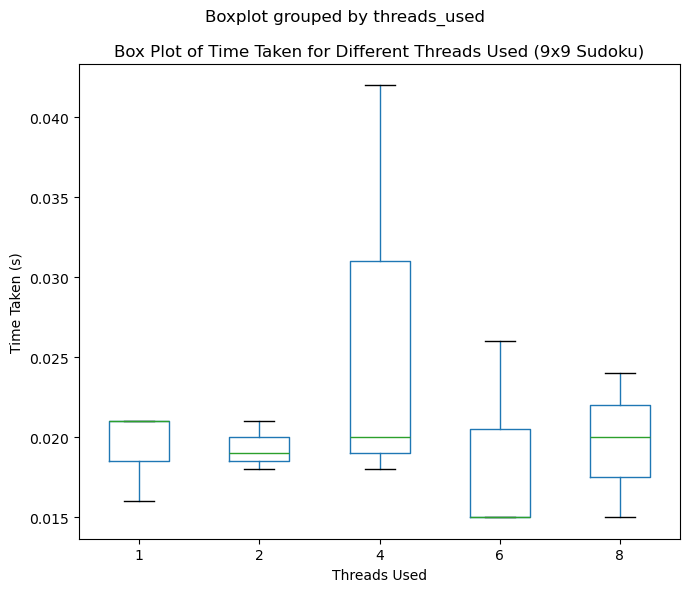

In [8]:
fig, ax = plt.subplots(figsize=(7, 6))

# First plot
grid_size_9.boxplot(column='time', by='threads_used', grid=False, ax=ax)
ax.set_xlabel('Threads Used')
ax.set_ylabel('Time Taken (s)')
ax.set_title('Box Plot of Time Taken for Different Threads Used (9x9 Sudoku)')
# ax.set_suptitle('')  # Suppress the default title to avoid overlap

plt.tight_layout()
plt.show()


### 16x16 sudoku

In [9]:
grid_size_16 = filtered_df_1[filtered_df_1['grid_size'] == 16]
grid_size_16.head()

,time,grid_size,block_size,threads_used,solutions,max_depth
1,87.483,16,4,1,80,3
3,131.530,16,4,2,80,3
5,82.261,16,4,4,80,3
7,124.397,16,4,6,80,3
9,87.366,16,4,8,80,3


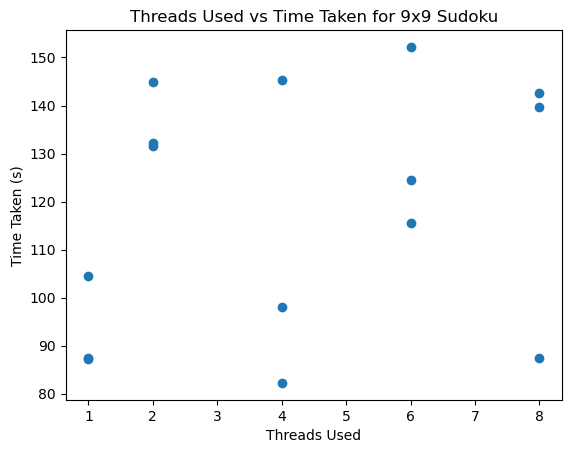

In [10]:
import matplotlib.pyplot as plt

threads_used = grid_size_16['threads_used'].values
time_taken = grid_size_16['time'].values

plt.scatter(threads_used, time_taken)
plt.xlabel('Threads Used')
plt.ylabel('Time Taken (s)')
plt.title('Threads Used vs Time Taken for 9x9 Sudoku')
plt.show()

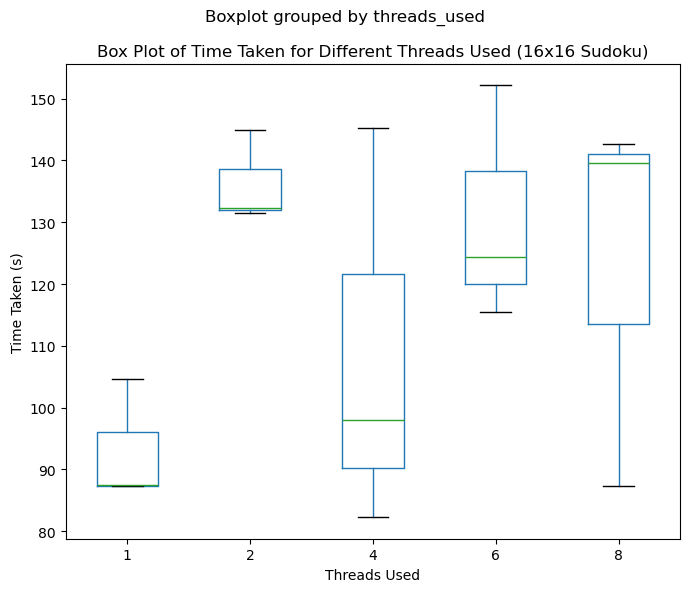

In [11]:
fig, ax = plt.subplots(figsize=(7, 6))

# First plot
grid_size_16.boxplot(column='time', by='threads_used', grid=False, ax=ax)
ax.set_xlabel('Threads Used')
ax.set_ylabel('Time Taken (s)')
ax.set_title('Box Plot of Time Taken for Different Threads Used (16x16 Sudoku)')
# ax.set_suptitle('')  # Suppress the default title to avoid overlap

plt.tight_layout()
plt.show()


## **Variable `max_depth`**

In [ ]:
filtered_df_2 = times_df.iloc[42:]
filtered_df_2.head()

,time,grid_size,block_size,threads_used,solutions,max_depth
500,0.005,9,3,1,1,3
501,20.544,16,4,1,80,3
502,0.010,9,3,2,1,3
503,34.217,16,4,2,80,3
504,0.009,9,3,4,1,3


### 9x9 sudoku

In [86]:
grid_size_9 = filtered_df_2[filtered_df_2['grid_size'] == 9]
grid_size_9.head()

,time,grid_size,block_size,threads_used,solutions,max_depth
500,0.005,9,3,1,1,3
502,0.010,9,3,2,1,3
504,0.009,9,3,4,1,3
506,0.010,9,3,6,1,3
508,0.010,9,3,8,1,3


C:\Users\camil\AppData\Local\Temp\ipykernel_21652\2969276742.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(avg_time.index, avg_time.values, color=color, edgecolor='black', marker='x', s=100, label=f'Average (Threads Used: {num_thread})')


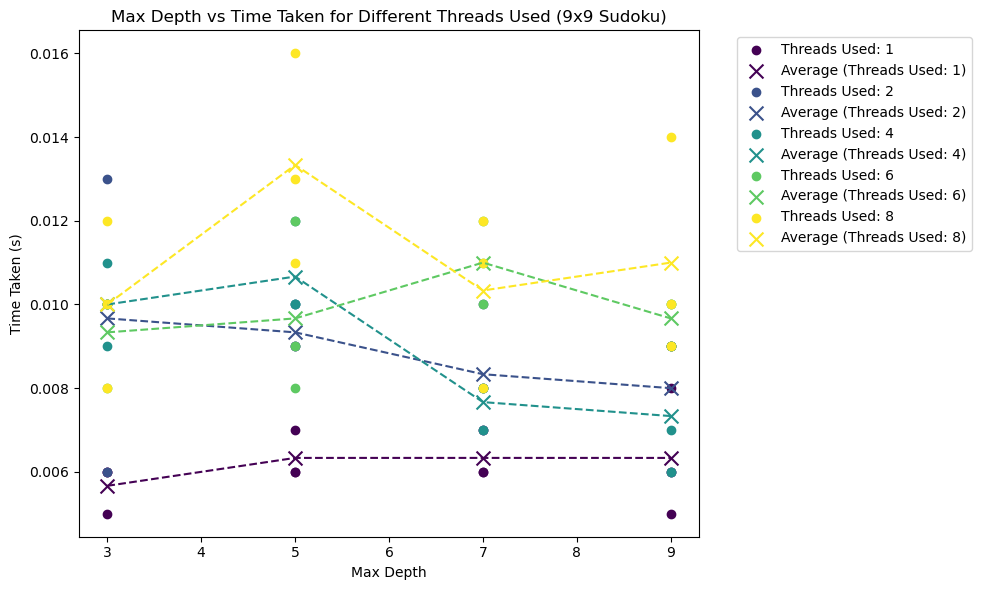

In [87]:
import matplotlib.pyplot as plt
import numpy as np

unique_threads = grid_size_9['threads_used'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_threads)))

fig, ax = plt.subplots(figsize=(10, 6))

for num_thread, color in zip(unique_threads, colors):
    subset = grid_size_9[grid_size_9['threads_used'] == num_thread]
    ax.scatter(subset['max_depth'], subset['time'], color=color, label=f'Threads Used: {num_thread}')
    
    # Calculate and plot the average point
    avg_time = subset.groupby('max_depth')['time'].mean()
    ax.scatter(avg_time.index, avg_time.values, color=color, edgecolor='black', marker='x', s=100, label=f'Average (Threads Used: {num_thread})')
    
    # Connect the average points
    ax.plot(avg_time.index, avg_time.values, color=color, linestyle='--')

ax.set_title('Max Depth vs Time Taken for Different Threads Used (9x9 Sudoku)')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Time Taken (s)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 16x16 sudoku

In [88]:
grid_size_16 = filtered_df_2[filtered_df_2['grid_size'] == 16]
grid_size_16.head()

,time,grid_size,block_size,threads_used,solutions,max_depth
501,20.544,16,4,1,80,3
503,34.217,16,4,2,80,3
505,22.072,16,4,4,80,3
507,26.895,16,4,6,80,3
509,30.773,16,4,8,80,3


C:\Users\camil\AppData\Local\Temp\ipykernel_21652\446961043.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(avg_time.index, avg_time.values, color=color, edgecolor='black', marker='x', s=100, label=f'Average (Threads Used: {num_thread})')


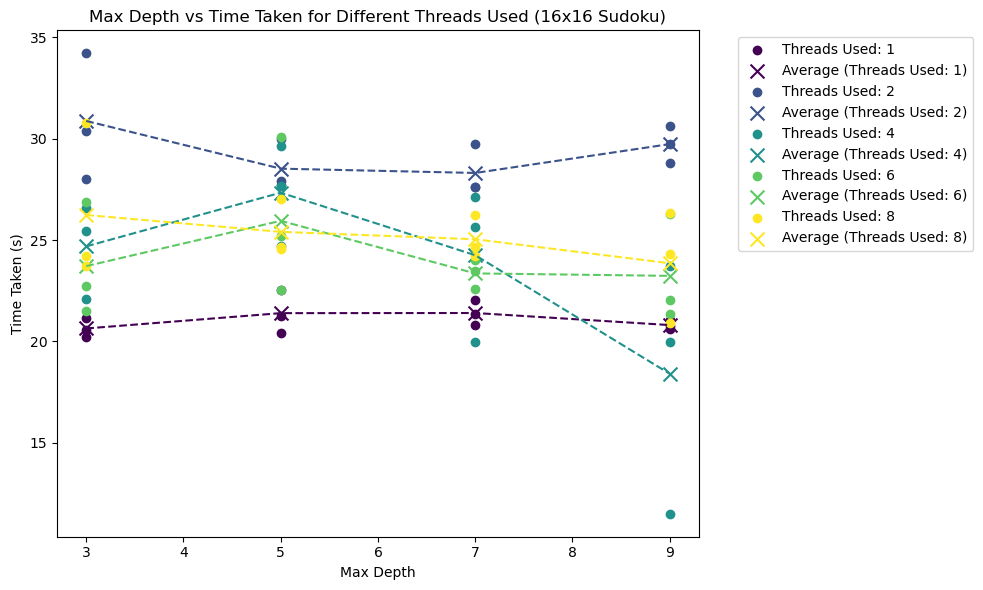

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out rows with max_depth greater than 9
grid_size_16_filtered = grid_size_16[grid_size_16['max_depth'] <= 9]

unique_threads = grid_size_16_filtered['threads_used'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_threads)))

fig, ax = plt.subplots(figsize=(10, 6))

for num_thread, color in zip(unique_threads, colors):
    subset = grid_size_16_filtered[grid_size_16_filtered['threads_used'] == num_thread]
    ax.scatter(subset['max_depth'], subset['time'], color=color, label=f'Threads Used: {num_thread}')
    
    # Calculate and plot the average point
    avg_time = subset.groupby('max_depth')['time'].mean()
    ax.scatter(avg_time.index, avg_time.values, color=color, edgecolor='black', marker='x', s=100, label=f'Average (Threads Used: {num_thread})')
    
    # Connect the average points
    ax.plot(avg_time.index, avg_time.values, color=color, linestyle='--')

ax.set_title('Max Depth vs Time Taken for Different Threads Used (16x16 Sudoku)')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Time Taken (s)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

There seems to be a trend with 4 threads and more depth, let's check it

C:\Users\camil\AppData\Local\Temp\ipykernel_21652\1744263187.py:13: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(avg_time.index, avg_time.values, color=color, edgecolor='black', marker='x', s=100, label=f'Average (Threads Used: {num_thread})')


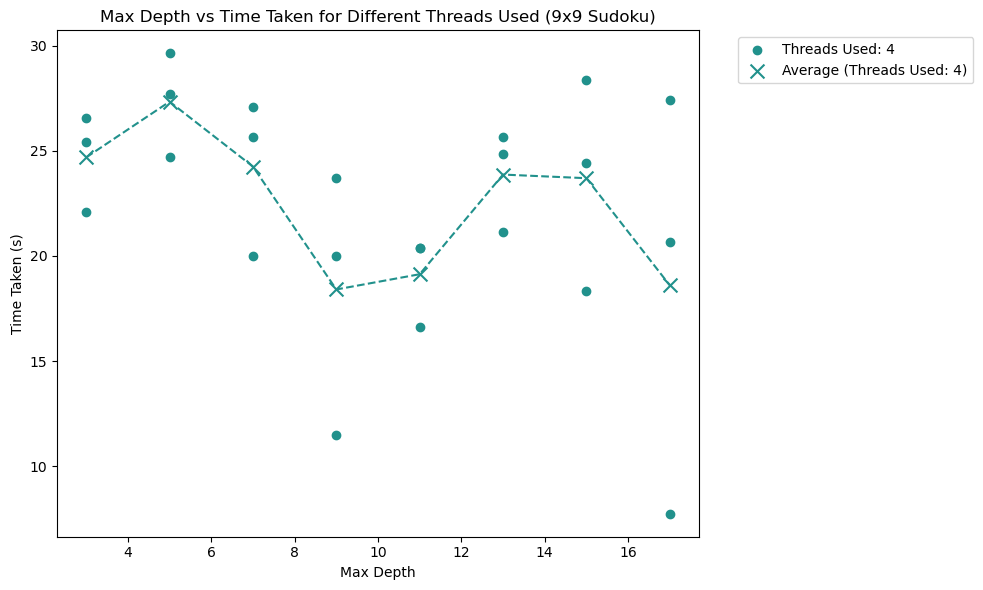

In [91]:
unique_threads = grid_size_16['threads_used'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_threads)))

fig, ax = plt.subplots(figsize=(10, 6))

for num_thread, color in zip(unique_threads, colors):
    if(num_thread == 4):
        subset = grid_size_16[grid_size_16['threads_used'] == num_thread]
        ax.scatter(subset['max_depth'], subset['time'], color=color, label=f'Threads Used: {num_thread}')
        
        # Calculate and plot the average point
        avg_time = subset.groupby('max_depth')['time'].mean()
        ax.scatter(avg_time.index, avg_time.values, color=color, edgecolor='black', marker='x', s=100, label=f'Average (Threads Used: {num_thread})')
        
        # Connect the average points
        ax.plot(avg_time.index, avg_time.values, color=color, linestyle='--')

ax.set_title('Max Depth vs Time Taken for Different Threads Used (9x9 Sudoku)')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Time Taken (s)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From the plot we get non conclusive results.